<a href="https://colab.research.google.com/github/tazkianida/cartoon-effect/blob/main/cartoon_effect_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Source
https://towardsdatascience.com/cartoonify-image-using-gan-generative-adversarial-network-34c60f39fff2

In [1]:
#Used for Importing Tensorflow Version 1
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
!git clone https://github.com/justinpinkney/stylegan2
%cd stylegan2
!nvcc test_nvcc.cu -o test_nvcc -run

Cloning into 'stylegan2'...
remote: Enumerating objects: 269, done.
remote: Total 269 (delta 0), reused 0 (delta 0), pack-reused 269
Receiving objects: 100% (269/269), 2.32 MiB | 40.96 MiB/s, done.
Resolving deltas: 100% (140/140), done.
/content/stylegan2
CPU says hello.
GPU says hello.


In [4]:
!mkdir raw
!mkdir aligned
!mkdir generated

In [5]:
import pretrained_networks
blended_url = "https://drive.google.com/uc?id=1H73TfV5gQ9ot7slSed_l-lim9X7pMRiU" 
ffhq_url = "http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-ffhq-config-f.pkl"
_, _, Gs_blended = pretrained_networks.load_networks(blended_url)
_, _, Gs = pretrained_networks.load_networks(ffhq_url)

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.


In [7]:
from google.colab import files
uploaded = files.upload() # then browse, select the files. It's then uploaded

Saving andre-sebastian-unsplash (1).jpg to andre-sebastian-unsplash (1).jpg


In [9]:
!mv 'andre-sebastian-unsplash (1).jpg' raw/

In [11]:
!python align_images.py raw aligned

64045056/64040097 [==============================] - 2s 0us/step


In [20]:
!python project_images.py --num-steps 1000 aligned generated

Loading networks from "http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Loading images from ".stylegan2-tmp/dataset/images"
detected 1 images ...
Creating dataset ".stylegan2-tmp/dataset/tfrecords"
Adding the images to tfrecords ...
added images 0
Added 1 images.
Projecting image "andre-sebastian-unsplash (1)_01.png"...


In [24]:
import numpy as np
from PIL import Image
import dnnlib
import dnnlib.tflib as tflib
from pathlib import Path 
latent_dir = Path("generated")
latents = latent_dir.glob("*.npy")
for latent_file in latents:
  latent = np.load(latent_file)
  latent = np.expand_dims(latent,axis=0)
  synthesis_kwargs =  dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=False), minibatch_size=8)
  images = Gs_blended.components.synthesis.run(latent, randomize_noise=False, **synthesis_kwargs)
  Image.fromarray(images.transpose((0,2,3,1))[0], 'RGB').save(latent_file.parent / (f"{latent_file.stem}-toon.jpg"))

In [27]:
import os 
os.getcwd() 
os.chdir('generated') 

In [28]:
!ls

'andre-sebastian-unsplash (1)_01.npy'
'andre-sebastian-unsplash (1)_01.png'
'andre-sebastian-unsplash (1)_01-toon.jpg'


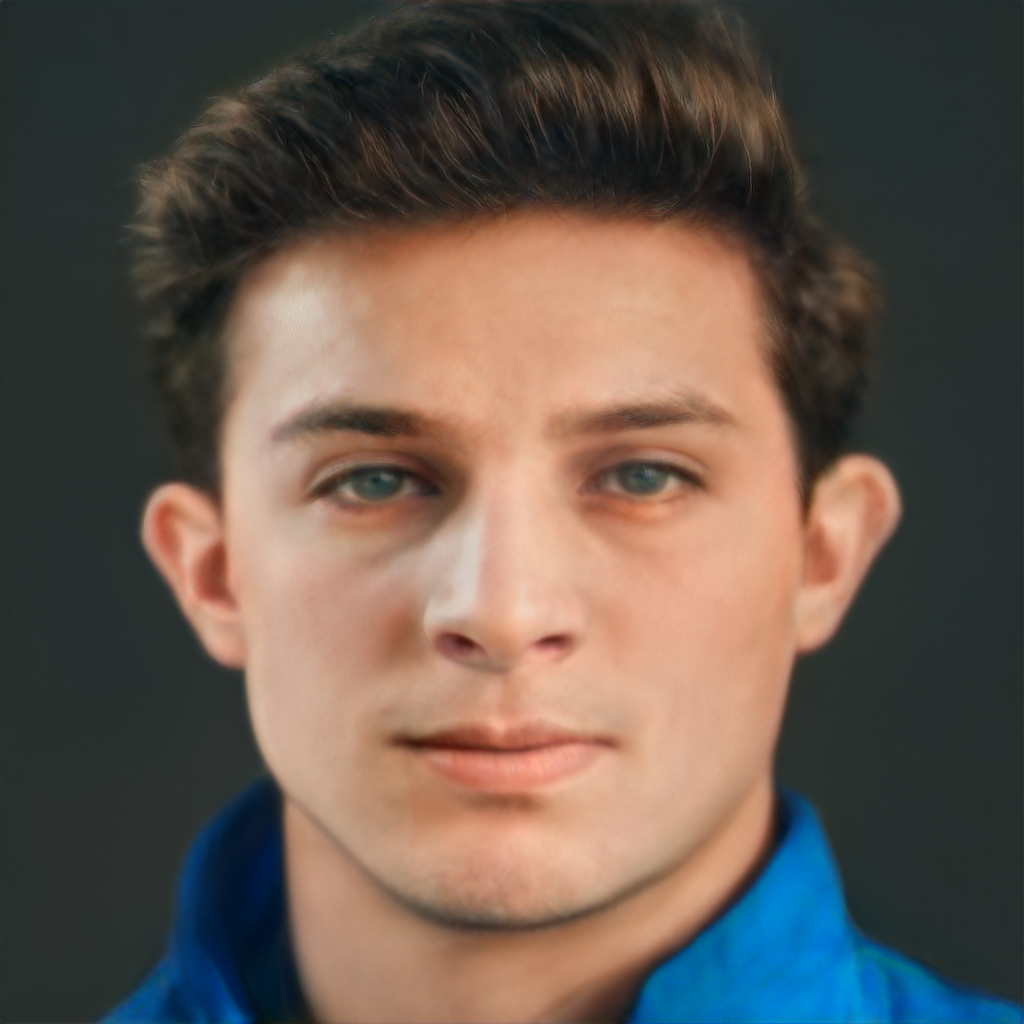

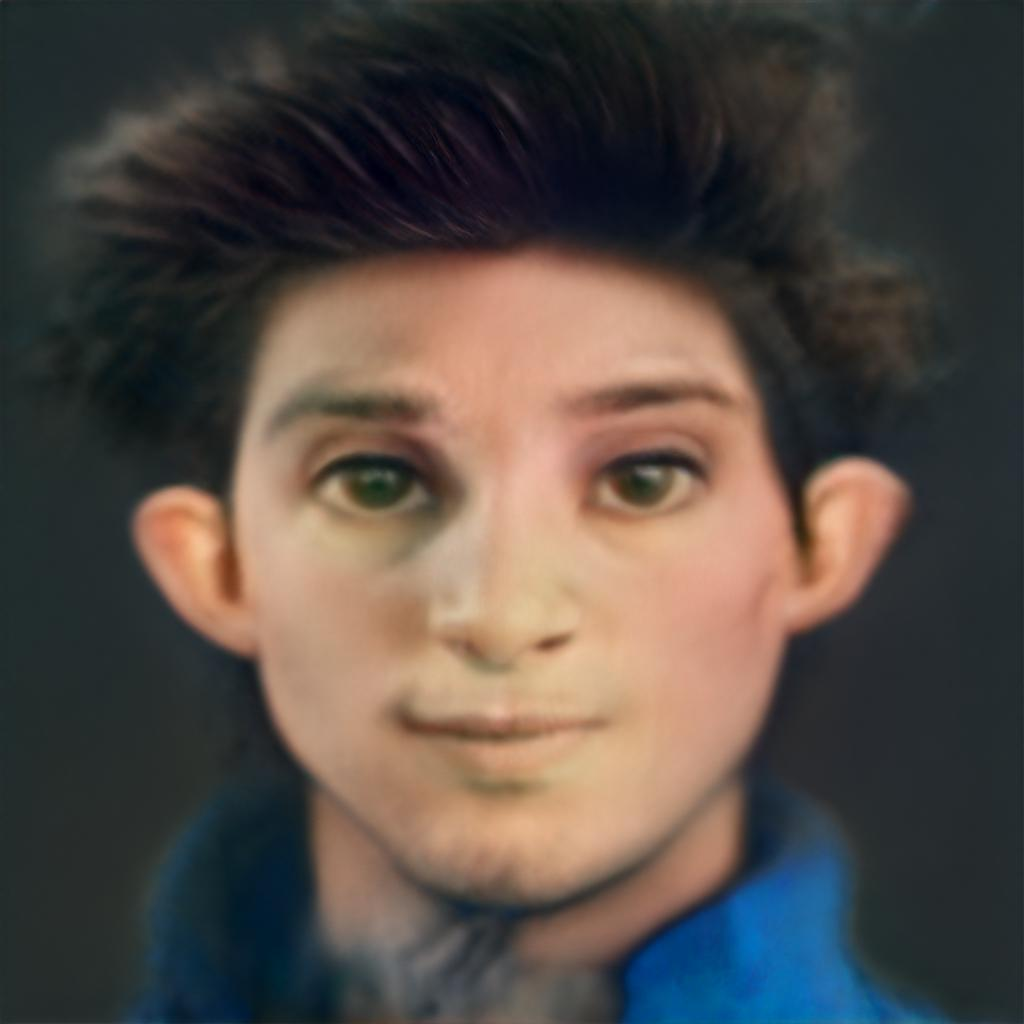

In [29]:
from IPython.display import Image 
embedded = Image(filename='andre-sebastian-unsplash (1)_01.png', width=256)
display(embedded)
tooned = Image(filename='andre-sebastian-unsplash (1)_01-toon.jpg', width=256)
display(tooned)